In [6]:
import pandas as pd
import json

In [7]:
# load the data
data = []
for line in open('nikis_data_analysis_hotdog_file', 'r'):
    data.append(json.loads(line))

In [8]:
#data

In [9]:
df = pd.DataFrame(data)
#df

In [10]:
#df.head(40)

In [11]:
# load the data
event_data = pd.read_csv('nikis_data_analysis_hotdog1of2')

In [18]:
demographic_data = pd.read_csv('nikis_data_analysis_hotdog2of2')
demographic_data = demographic_data.drop(columns=['event_name'])

In [19]:
event_data.head(10)

,user_pseudo_id,count_link_click,count_scroll,count_first_visit,count_click,count_pageview,count_external_click,count_file_download,count_user_engagement,engagement_rate
0,1.918139e+09,60,10,7,0,0,0,0,93,0.590909
1,1.197979e+09,26,0,7,0,0,0,0,18,0.416667
2,9.730946e+08,0,0,5,26,0,24,0,21,0.222222
3,1.083412e+08,0,10,4,0,0,0,0,9,0.458333
4,6.569243e+08,0,0,7,0,0,0,0,0,0.142857
5,2.100184e+09,0,11,7,14,0,13,14,10,0.428571
6,4.901583e+08,0,0,5,0,0,0,0,45,0.086957
7,1.005520e+09,0,55,6,0,0,0,0,70,0.450000
8,1.510318e+09,102,252,7,111,0,111,0,228,0.817308
9,1.315398e+09,42,24,7,0,0,0,0,44,0.937500


In [20]:
demographic_data.head(10)

,user_pseudo_id,device_category,browser,country,traffic_medium,traffic_source
0,1.945400e+09,desktop,Opera,Brazil,(none),(direct)
1,1.945400e+09,desktop,Opera,Brazil,(none),(direct)
2,1.945400e+09,desktop,Opera,Brazil,(none),(direct)
3,1.945400e+09,desktop,Opera,Brazil,(none),(direct)
4,1.945400e+09,desktop,Opera,Brazil,(none),(direct)
5,1.945400e+09,desktop,Opera,Brazil,(none),(direct)
6,1.945400e+09,desktop,Opera,Brazil,(none),(direct)
7,1.945400e+09,desktop,Opera,Brazil,(none),(direct)
8,1.945400e+09,desktop,Opera,Brazil,(none),(direct)
9,1.945400e+09,desktop,Opera,Brazil,(none),(direct)


In [21]:
unique_user_ids = demographic_data['user_pseudo_id'].unique()

In [30]:
from collections import Counter

new_demographic_data = pd.DataFrame(columns = demographic_data.columns)

# Program to find most frequent 
# element in a list
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]

for current_user in unique_user_ids:
    current_data = demographic_data.loc[demographic_data['user_pseudo_id'] == current_user]
    current_data = current_data.reset_index()
    new_demographic_data = new_demographic_data.append({'user_pseudo_id' : current_user,
                                                        'device_category' : most_frequent(current_data['device_category']),
                                                        'browser' : most_frequent(current_data['browser']),
                                                        'country' : most_frequent(current_data['country']),
                                                        'traffic_medium' : most_frequent(current_data['traffic_medium']),
                                                        'traffic_source' : most_frequent(current_data['traffic_source'])
                                                        },ignore_index=True)

In [32]:
new_demographic_data.head(30)

,user_pseudo_id,device_category,browser,country,traffic_medium,traffic_source
0,1.945400e+09,desktop,Opera,Brazil,(none),(direct)
1,1.581400e+09,desktop,Opera,Philippines,(none),(direct)
2,8.674257e+08,mobile,Chrome,United Arab Emirates,(none),(direct)
3,1.492316e+09,mobile,Chrome,New Zealand,(none),(direct)
4,1.314226e+08,mobile,Chrome,Vietnam,(none),(direct)
5,1.397745e+09,mobile,Chrome,India,(none),(direct)
6,1.612394e+08,mobile,Chrome,Australia,(none),(direct)
7,2.040025e+08,mobile,Chrome,Australia,(none),(direct)
8,4.047523e+08,mobile,Chrome,Australia,(none),(direct)
9,1.608733e+09,mobile,Safari (in-app),Australia,(none),(direct)


In [33]:
new_demographic_data['traffic_source'].unique()


array(['(direct)', '(organic)', '(referral)',
       '1e5eee101a-RSS_EMAIL_CAMPAIGN', '95f02ea0b7-RSS_EMAIL_CAMPAIGN',
       'e81817c10f-RSS_EMAIL_CAMPAIGN', 'top_local_agency',
       '5f8a312297-RSS_EMAIL_CAMPAIGN', 'c82359c15f-RSS_EMAIL_CAMPAIGN',
       '181d70e778-AUTOMATION_Welcome_Message_1',
       '1127265f1c-RSS_EMAIL_CAMPAIGN',
       '263b06705e-EMAIL_CAMPAIGN_2020_10_11_11_24',
       'b9d16d42e5-RSS_EMAIL_CAMPAIGN',
       'c40a92b995-EMAIL_CAMPAIGN_2018_08_24_01_08',
       'e8619a50dc-RSS_EMAIL_CAMPAIGN', '3f77d4cc48-RSS_EMAIL_CAMPAIGN',
       '82c052c885-RSS_EMAIL_CAMPAIGN', 'afr-inside-government',
       'CV19WhatsApp', '0e3d5d6ac7-RSS_EMAIL_CAMPAIGN',
       'confrimation-email', '8486587e17-RSS_EMAIL_CAMPAIGN',
       'b4a82158d7-RSS_EMAIL_CAMPAIGN', 'da817e65b6-RSS_EMAIL_CAMPAIGN',
       'ce39e9a16b-RSS_EMAIL_CAMPAIGN', '2d393f887c-RSS_EMAIL_CAMPAIGN',
       '917724a1d9-EMAIL_CAMPAIGN_2018_06_17_11_48_COPY_02'], dtype=object)

In [34]:
new_demographic_data['traffic_medium'].unique()

array(['(none)', 'organic', 'referral', 'email', 'Social'], dtype=object)

In [35]:
new_demographic_data['browser'].unique()

array(['Opera', 'Chrome', 'Safari (in-app)', 'Safari', 'Samsung Internet',
       'UC Browser', 'Android Webview', 'Firefox', 'Edge',
       'Internet Explorer', 'YaBrowser', 'Android Browser', 'Puffin',
       'Mozilla Compatible Agent', 'Zabbix', 'capnovum-1', 'Coc Coc',
       'Mozilla', '[FBAN', 'mozilla', 'SeaMonkey 2.4a1', 'uzbl ',
       'SeaMonkey 2.26.1', 'Netscape 3.01Gold', 'Chrome 11.0.696.3',
       'Chrome 11.0.696.71', 'Firefox 3.6', 'Konqueror', 'Camino',
       'Lunascape', 'Iron'], dtype=object)

In [36]:
all_data = pd.merge(event_data,new_demographic_data,on='user_pseudo_id')

In [37]:
all_data.head(20)

,user_pseudo_id,count_link_click,count_scroll,count_first_visit,count_click,count_pageview,count_external_click,count_file_download,count_user_engagement,engagement_rate,device_category,browser,country,traffic_medium,traffic_source
0,1.918139e+09,60,10,7,0,0,0,0,93,0.590909,mobile,Safari,Australia,organic,(organic)
1,1.197979e+09,26,0,7,0,0,0,0,18,0.416667,mobile,Chrome,Australia,referral,(referral)
2,9.730946e+08,0,0,5,26,0,24,0,21,0.222222,mobile,Safari,Australia,organic,(organic)
3,1.083412e+08,0,10,4,0,0,0,0,9,0.458333,mobile,Chrome,Australia,(none),(direct)
4,6.569243e+08,0,0,7,0,0,0,0,0,0.142857,mobile,Chrome,Australia,organic,(organic)
5,2.100184e+09,0,11,7,14,0,13,14,10,0.428571,desktop,Chrome,Thailand,organic,(organic)
6,4.901583e+08,0,0,5,0,0,0,0,45,0.086957,desktop,Chrome,Germany,referral,(referral)
7,1.005520e+09,0,55,6,0,0,0,0,70,0.450000,desktop,Edge,Australia,(none),(direct)
8,1.510318e+09,102,252,7,111,0,111,0,228,0.817308,desktop,Chrome,Australia,organic,(organic)
9,1.315398e+09,42,24,7,0,0,0,0,44,0.937500,desktop,Chrome,Australia,organic,(organic)


Text(0.5, 0, 'Engagement Rate')

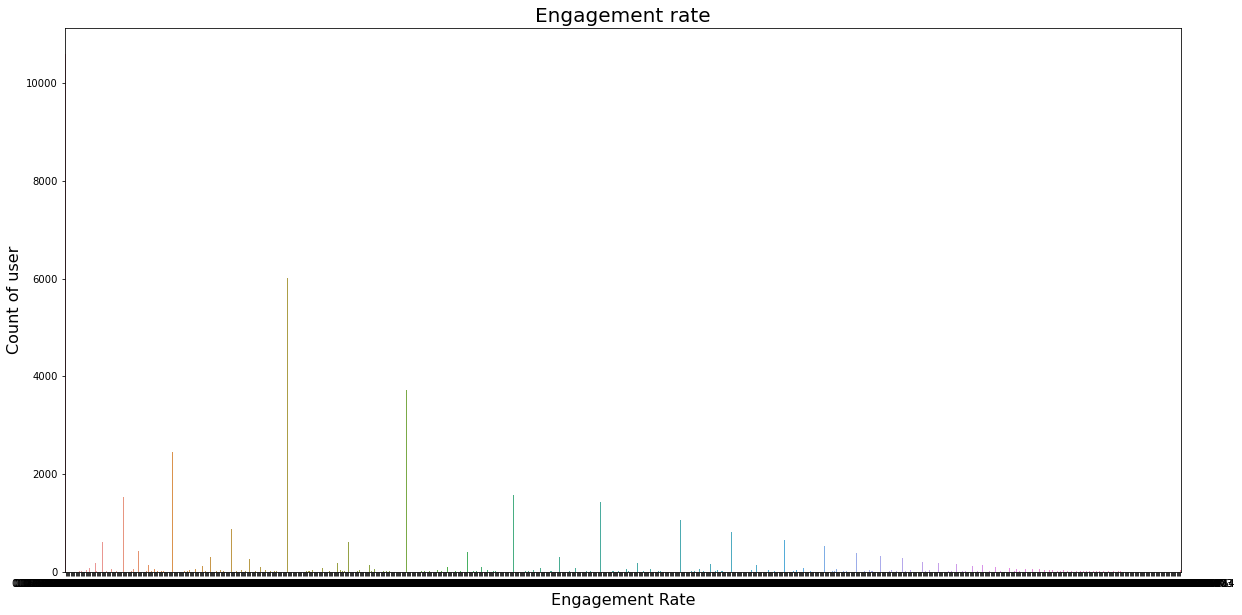

In [40]:
# Very good!!!! Now lets have a look at the engagement rate
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x="engagement_rate",data=all_data)
ax.set_title('Engagement rate',fontsize=20)
ax.set_ylabel('Count of user',fontsize=16)
ax.set_xlabel('Engagement Rate',fontsize=16)

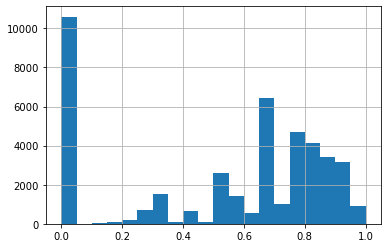

In [41]:
hist = all_data['engagement_rate'].hist(bins=20)

In [57]:
# Lets set a limit of 0.6 so that we can say someone is 'engaged' if over 60% of the events has session_engaged = 1
# as opposed to session_engaged = 0
import numpy as np

all_data['label'] = np.where(all_data['engagement_rate'] >= 0.6, 1, 0)


KeyError: 'engagement_rate'

In [45]:
all_data

,user_pseudo_id,count_link_click,count_scroll,count_first_visit,count_click,count_pageview,count_external_click,count_file_download,count_user_engagement,engagement_rate,device_category,browser,country,traffic_medium,traffic_source,label
0,1.918139e+09,60,10,7,0,0,0,0,93,0.590909,mobile,Safari,Australia,organic,(organic),0
1,1.197979e+09,26,0,7,0,0,0,0,18,0.416667,mobile,Chrome,Australia,referral,(referral),0
2,9.730946e+08,0,0,5,26,0,24,0,21,0.222222,mobile,Safari,Australia,organic,(organic),0
3,1.083412e+08,0,10,4,0,0,0,0,9,0.458333,mobile,Chrome,Australia,(none),(direct),0
4,6.569243e+08,0,0,7,0,0,0,0,0,0.142857,mobile,Chrome,Australia,organic,(organic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42320,5.773921e+08,0,15,7,13,0,13,0,14,0.857143,desktop,Chrome,Australia,organic,(organic),1
42321,7.237241e+08,12,11,7,14,0,14,0,0,0.857143,desktop,Chrome,Australia,referral,(referral),1
42322,4.836013e+08,0,0,7,26,0,26,0,14,0.857143,desktop,Chrome,Australia,organic,(organic),1
42323,1.238331e+09,16,0,7,15,0,14,15,0,0.857143,mobile,Chrome,Australia,organic,(organic),1


In [46]:
all_data['label'].value_counts()

1    25195
0    17130
Name: label, dtype: int64

In [47]:
all_data = all_data.drop(columns=['engagement_rate'])

In [48]:
all_data = all_data.drop(columns=['user_pseudo_id'])

In [49]:
all_data.dtypes

count_link_click          int64
count_scroll              int64
count_first_visit         int64
count_click               int64
count_pageview            int64
count_external_click      int64
count_file_download       int64
count_user_engagement     int64
device_category          object
browser                  object
country                  object
traffic_medium           object
traffic_source           object
label                     int64
dtype: object

In [50]:
categorical_columns = ['device_category', 'browser', 'country', 'traffic_medium', 'traffic_source']
for col in categorical_columns:
    dummies = pd.get_dummies(all_data[col])
    for dummy in dummies:
        all_data[col+"_"+dummy] = dummies[dummy]
        
all_data = all_data.drop(columns=categorical_columns)
all_data.dtypes

count_link_click                                int64
count_scroll                                    int64
count_first_visit                               int64
count_click                                     int64
count_pageview                                  int64
                                                ...  
traffic_source_confrimation-email               uint8
traffic_source_da817e65b6-RSS_EMAIL_CAMPAIGN    uint8
traffic_source_e81817c10f-RSS_EMAIL_CAMPAIGN    uint8
traffic_source_e8619a50dc-RSS_EMAIL_CAMPAIGN    uint8
traffic_source_top_local_agency                 uint8
Length: 245, dtype: object

In [51]:
all_data.shape

(42325, 245)

In [52]:
X = all_data.drop(columns=['label'])
y = all_data['label']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train,y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.72      0.80      5111
           1       0.83      0.94      0.88      7587

    accuracy                           0.85     12698
   macro avg       0.86      0.83      0.84     12698
weighted avg       0.85      0.85      0.85     12698



In [55]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      5111
           1       0.86      0.91      0.88      7587

    accuracy                           0.86     12698
   macro avg       0.86      0.84      0.85     12698
weighted avg       0.86      0.86      0.86     12698



In [56]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      5111
           1       0.85      0.95      0.90      7587

    accuracy                           0.88     12698
   macro avg       0.89      0.86      0.87     12698
weighted avg       0.88      0.88      0.87     12698



In [58]:
cm

array([[3702, 1409],
       [ 483, 7104]])

In [ ]:
#hierachal clustering